## Перекрестная проверка

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Создание модели LogisticRegression с масштабированием данных
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
scores = cross_val_score(logreg, X, y, cv=5)

print("Cross-validation scores: {}".format(scores))
print("Average accuracy of cross-checking: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Average accuracy of cross-checking: 0.98


In [13]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, breast_cancer.data, breast_cancer.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.02138519, 0.0234313 , 0.0159986 , 0.01950502, 0.01823592]),
 'score_time': array([0.00300074, 0.00199604, 0.00200033, 0.00099993, 0.00199294]),
 'test_score': array([0.98245614, 0.98245614, 0.97368421, 0.97368421, 0.99115044]),
 'train_score': array([0.99120879, 0.98901099, 0.98901099, 0.99120879, 0.98684211])}

In [15]:
import pandas as pd

res_df = pd.DataFrame(res)
display(res_df)
print('Mean times and scores:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.021385,0.003001,0.982456,0.991209
1,0.023431,0.001996,0.982456,0.989011
2,0.015999,0.002000,0.973684,0.989011
3,0.019505,0.001000,0.973684,0.991209
4,0.018236,0.001993,0.991150,0.986842


mean time and score:
 fit_time       0.019711
score_time     0.001998
test_score     0.980686
train_score    0.989456
dtype: float64


In [16]:
print('breast_cancer targets: {}'.format(y))

breast_cancer targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [18]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Accuracy value of cross-validation:\n{}".format(
    cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

Accuracy value of cross-validation:
[0.97368421 0.95614035 0.98245614 0.98245614 0.99115044]


In [19]:
kfold = KFold(n_splits=3)
print("Accuracy value of cross-validation:\n{}".format(
    cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

Accuracy value of cross-validation:
[0.95789474 0.97894737 0.97354497]


In [22]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Accuracy value of cross-validation:\n{}".format(
    cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

Accuracy value of cross-validation:
[0.97894737 0.95789474 0.98941799]


In [33]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()
scores = cross_val_score(logreg, X, y, cv=loo)

print("Number of iterations:", loo.get_n_splits(X))
print("Average correctness of the model:", scores.mean())


Number of iterations: 569
Average correctness of the model: 0.9789103690685413


In [24]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
shuffle_scores = cross_val_score(logreg, X, y, cv=shuffle_split)

print("Accuracy values of shuffle-split cross-validation:\n{}".format(shuffle_scores))

Accuracy values of shuffle-split cross-validation:
[0.95438596 0.97192982 0.98947368 0.96842105 0.9754386  0.94736842
 0.96491228 0.98245614 0.96491228 0.9754386 ]


In [25]:
from sklearn.model_selection import GroupKFold

groups = [i % 3 for i in range(len(y))]

group_kfold = GroupKFold(n_splits=3)
scores = cross_val_score(logreg, X, y, groups=groups, cv=group_kfold)

print("Number of cross-validation splits:", group_kfold.get_n_splits(X, y, groups))
print("Model quality for each fold:", scores)
print("Average model quality:", scores.mean())

Number of cross-validation splits: 3
Model quality for each fold: [0.97894737 0.98421053 0.97354497]
Average model quality: 0.9789009560939386


## Решетчатый поиск

In [26]:
from sklearn.model_selection import train_test_split

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Train set shape: {}, test train shape: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for C in [0.001, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        logr = LogisticRegression(C=C, penalty=penalty, solver='saga', max_iter=10000)
        logr.fit(X_train, y_train)
        l_score = logr.score(X_test, y_test)
        print('C: ', C, 'penalty: ', penalty, 'accuracy: {:.3f}'.format(l_score))

        if l_score > best_score:
            best_score = l_score
            best_parameters = {'C': C, 'penalty': penalty}

print("The best accuracy value: {:.3f}".format(best_score))
print("The best parameter values: {}".format(best_parameters))

Train set shape: 426, test train shape: 143
C:  0.001 penalty:  l1 accuracy: 0.916
C:  0.001 penalty:  l2 accuracy: 0.944
C:  0.1 penalty:  l1 accuracy: 0.944
C:  0.1 penalty:  l2 accuracy: 0.937
C:  1 penalty:  l1 accuracy: 0.937
C:  1 penalty:  l2 accuracy: 0.937
C:  10 penalty:  l1 accuracy: 0.937
C:  10 penalty:  l2 accuracy: 0.937
The best accuracy value: 0.944
The best parameter values: {'C': 0.001, 'penalty': 'l2'}


In [27]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_svc_parameters = (gamma, C)

print("Best SVM score: ", best_svc)
print("Best parameters: ", best_svc_parameters)

Best SVM score:  0.9300699300699301
Best parameters:  (0.001, 1)


In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [40]:
print("Correctness on the test set: {:.2f}".format(grid_search.score(X_test,y_test)))
print("Best value of parameters: {}".format(grid_search.best_params_))
print("Best cross validation correctness value: {:.2f}".format(grid_search.best_score_))
print("The best model:\n{}".format(grid_search.best_estimator_))

Correctness on the test set: 0.96
Best value of parameters: {'C': 100, 'kernel': 'linear'}
Best cross validation correctness value: 0.97
The best model:
SVC(C=100, kernel='linear')


In [41]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019025,0.002446,0.011832,0.001620,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
1,0.020738,0.004297,0.009813,0.000992,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
2,0.017090,0.003643,0.008724,0.003759,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
3,0.045074,0.018915,0.026572,0.014540,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
4,0.062664,0.050393,0.022866,0.009198,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


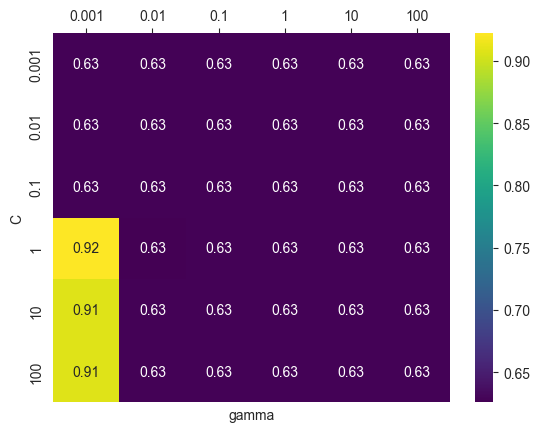

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

model = SVC(kernel='rbf')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

sc = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

ax = sns.heatmap(sc, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()
plt.show() 

In [53]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [61]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train,y_train)
print("Best value of parameters: {}".format(grid_search.best_params_))
print("Best cross validation correctness value: {:.2f}".format(grid_search.best_score_))

Best value of parameters: {'C': 100, 'kernel': 'linear'}
Best cross validation correctness value: 0.97


In [55]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029487,0.017805,0.017389,0.010333,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
1,0.015256,0.004083,0.009450,0.002269,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
2,0.056391,0.022214,0.018746,0.003956,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
3,0.061970,0.033421,0.022246,0.003918,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
4,0.025824,0.005355,0.014574,0.004548,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
5,0.025340,0.006171,0.011562,0.001615,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
6,0.021471,0.008851,0.006299,0.002480,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
7,0.022190,0.003599,0.007714,0.003336,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
8,0.022530,0.005932,0.008651,0.003311,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12
9,0.026323,0.006419,0.015465,0.007589,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,12


In [60]:
scores=cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), X, y, cv=5)
print("Importance of correctness of cross-checking: ", scores)
print("Average value of cross-check correctness: ", scores.mean())

Importance of correctness of cross-checking:  [0.93859649 0.92982456 0.97368421 0.92105263 0.98230088]
Average value of cross-check correctness:  0.9490917559385188


In [62]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы) 
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

scores=nested_cv(X,y, StratifiedKFold(5),StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Importance of correctness of cross-checking: {}".format(scores))

Importance of correctness of cross-checking: [0.93859649 0.93859649 0.97368421 0.94736842 0.95575221]


## Метрики качества моделей и их вычисление


In [63]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([212, 357], dtype=int64))


In [66]:
from sklearn.metrics import accuracy_score

logreg.fit(X, y)
y_pred = logreg.predict(X)
print("Accuracy of the trained model is", round(accuracy_score(y, y_pred), 3))

Accuracy of the trained model is 0.988


In [67]:
from sklearn.dummy import DummyClassifier

X_malignant = X[y == 0]
y_malignant = y[y == 0]
X_benign = X[y == 1]
y_benign = y[y == 1]
X_new = np.r_[X_benign, X_malignant[:50]]
y_new = np.r_[y_benign, y_malignant[:50]]
print(np.unique(y_new, return_counts=True))

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_new, y_new)
pred_dummy = dummy.predict(X_new)

print(np.unique(pred_dummy, return_counts=True))
print('accuracy of the dummy classifier is', round(accuracy_score(y_new, pred_dummy), 2))

(array([0, 1]), array([ 50, 357], dtype=int64))
(array([1]), array([407], dtype=int64))
accuracy of the dummy classifier is 0.88


In [69]:
from sklearn.metrics import confusion_matrix

matrix_c = confusion_matrix(y, y_pred)
print(matrix_c)
print("Accuracy score of the model is: ", round(accuracy_score(y_pred, y), 2))

[[207   5]
 [  2 355]]
Accuracy score of the model is:  0.99


<Axes: >

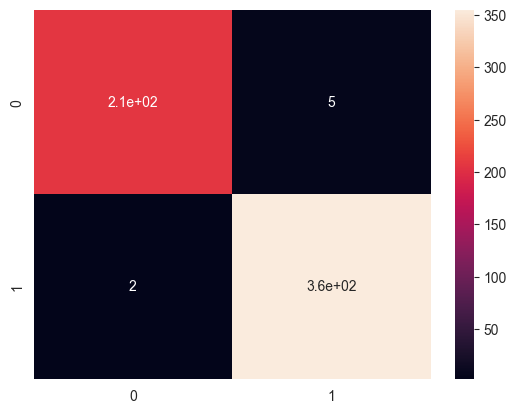

In [70]:
import seaborn as sns

sns.heatmap(matrix_c, annot=True)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569
